# Statistical analysis between coastal and adjacent ocean cells around Tasmania

## Importing packages

In [1]:
from datetime import date 
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.ndimage as ndimage
from scipy.ndimage import convolve
from scipy.ndimage.measurements import label, find_objects
import xarray as xr

## Opening the mask file

In [2]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/static_era5.nc').sel(longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
mask = xr.where(ds.lsm==0, 0, 1)
mask

<xarray.DataArray 'lsm' (time: 1, latitude: 21, longitude: 21)>
array([[[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])
Coordinates:
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * time       (time) datetime64[ns] 2000-01-01

## Finding coastal cells
Using scipy.ndimage convolve

k is an array of weights, with the same number of dimensions as input

In [3]:
k =([[[1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]]])

input array 'mask' is convolved with 'k', mode='constant' which ensures that the input is extended by filling all values beyond the edge with the same constant value

In [4]:
c = convolve(mask, k, mode='constant')

In [5]:
c

array([[[1, 2, 0, 0, 0, 0, 1, 2, 4, 5, 5, 5, 5, 4, 4, 3, 3, 2, 1, 0, 0],
        [3, 4, 1, 0, 0, 0, 1, 3, 4, 6, 7, 8, 8, 7, 6, 5, 5, 3, 2, 0, 0],
        [4, 4, 2, 0, 0, 0, 0, 1, 2, 5, 6, 8, 8, 8, 8, 8, 8, 5, 3, 0, 0],
        [5, 5, 3, 0, 0, 0, 0, 0, 0, 2, 3, 5, 5, 6, 7, 8, 8, 6, 4, 1, 0],
        [4, 5, 4, 3, 3, 2, 1, 0, 0, 1, 2, 3, 3, 4, 5, 7, 8, 7, 4, 2, 0],
        [2, 5, 4, 5, 5, 3, 2, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 8, 5, 3, 0],
        [1, 4, 5, 8, 8, 6, 5, 2, 1, 0, 1, 2, 3, 3, 5, 6, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 7, 6, 4, 4, 3, 4, 4, 5, 5, 6, 7, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 7, 6, 5, 6, 7, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 3, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 0],
        [0, 0, 2, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 4, 1],
        [0, 0, 1, 4, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

coastal array is 1 when the mask==1 and the sum of neighbouring cells is < 8 (which means at least one cell is neighbouring a 0 (or sea grid cell)

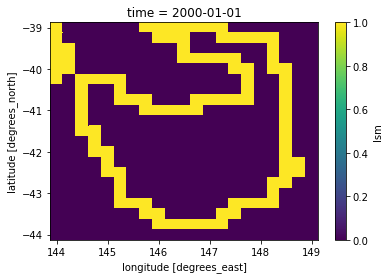

In [6]:
coastal = np.logical_and(mask == 1, c < 8)
coastal.astype(int).plot()

In [7]:
def fix(ds):
    # This function makes the original data array repeatable so that it matches with the shape of the other data array.

    trial = ds
    i = 0
    while i < 13514:  # <-- Here, 13514 corresponds to the timesteps in land dataset 
        trial = xr.concat([trial, ds], 'time')
        i+=1
    trial = trial.isel(time = slice(0,13514))
    # to specify the dates/time 
    trial.coords['time'] = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1) 
    
    t = np.arange(date(1982,1,1).toordinal(),date(2018,12,31).toordinal()+1)
    dates = [date.fromordinal(tt.astype(int)) for tt in t]
    
    trial.coords['time'] = dates

    return trial

In [8]:
new_coastal = fix(coastal)  # new_coastal will now have the same shape as anom 

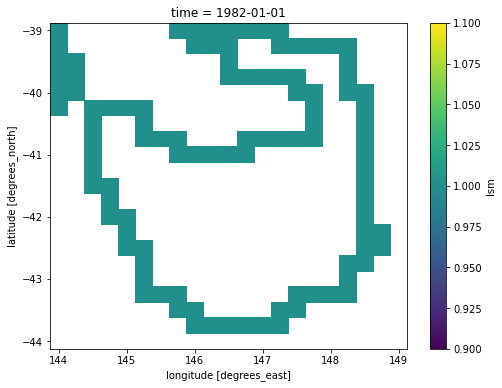

In [9]:
coast_grids = new_coastal.where(new_coastal != 0)
coast_grids
coast_grids.isel(time=0).plot(figsize=(8,6))

#plt.savefig('tasmania-coastal-cells')

In [10]:
coast_grids

<xarray.DataArray 'lsm' (time: 13514, latitude: 21, longitude: 21)>
array([[[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1., nan, nan, ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan, nan, nan],
        [ 1.,  1., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * latitude   (latitude) float32 -39.0 -39.25 -39.5 ... -43.5 -43.75 -44.0
  * longitude  (longitude) float32 144.0 144.25 144.5 ... 148.5 148.75 149.0
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31

In [11]:
coast_sel_stacked = coast_grids.stack(latlon=('latitude', 'longitude')).dropna(dim='latlon')
# this stacks all lat, lon pairs corresponding to the coastal cells 

In [12]:
coast_sel_stacked

<xarray.DataArray 'lsm' (time: 13514, latlon: 102)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * time       (time) object 1982-01-01 1982-01-02 ... 2018-12-30 2018-12-31
  * latlon     (latlon) MultiIndex
  - latitude   (latlon) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
  - longitude  (latlon) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2

In [13]:
#coast_sel_stacked.unstack().reindex(longitude=sorted(coast_grids.longitude)).isel(time=0).plot()

## Anomaly datasets

In [14]:
# thw severity 
tasa = xr.open_dataset('/g/data/e14/cp3790/Charuni/filtered_severity_final_new_mask.nc').sel(time=slice('1982', '2018'), longitude=slice(144.0, 149.0), latitude=slice(-39.0, -44.0))
severity = tasa.severity

In [15]:
# mhw severity 
mhw = xr.open_dataset('/g/data/e14/cp3790/Charuni/filtered_severity_mhw.nc').sel(time=slice('1982', '2018'), lon=slice(144.0, 149.0), lat=slice(-44.0, -39.0))
sev = mhw.severity

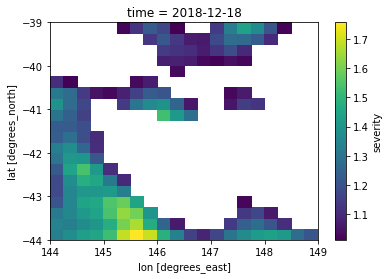

In [16]:
sev.isel(time=13500).plot()

Using the stacked latlon locations of coastal cells to find the location of the corresponding cells in the (land) severity dataset which I now call 'landcells' and finding neighbouring cells in the (oceam) sev dataset, which I now call 'localcells'

In [17]:
series1 = []
series2 = []
for (lat, lon) in coast_sel_stacked.latlon.values:
    cen = severity.sel(latitude=lat, longitude=lon, method='nearest')
    cen_lat = cen.latitude.values
    cen_lon = cen.longitude.values
    landcells = severity.sel(latitude=cen_lat, longitude=cen_lon)
    centre = sev.sel(lat=lat, lon=lon, method='nearest')
    centre_lat = centre.lat.values
    centre_lon = centre.lon.values
    localcells = sev.sel(lat=slice(centre_lat-0.3,centre_lat+0.3), lon=slice(centre_lon-0.3,centre_lon+0.3))
    series1.append(landcells)
    series2.append(localcells.mean(dim=('lat', 'lon')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [18]:
series1_ds = xr.concat(series1, 'ncell')
series2_ds = xr.concat(series2, 'ncell')

In [1]:
series1_ds.plot()

NameError: name 'series1_ds' is not defined

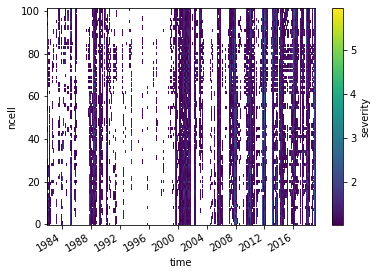

In [20]:
series2_ds.plot()

In [21]:
thw_new = xr.where(series1_ds > 1.0, 1, 0)

In [22]:
mhw_new = xr.where(series2_ds > 1.0, 1, 0)

In [23]:
series2_ds = series2_ds.assign_coords(longitude=series1_ds.longitude, latitude=series1_ds.latitude)

In [24]:
series2_ds

<xarray.DataArray 'severity' (ncell: 102, time: 13514)>
array([[      nan,       nan,       nan, ..., 2.1479492, 1.9821777,
        2.0239258],
       [      nan,       nan,       nan, ..., 2.1775715, 2.0141602,
        1.9832357],
       [      nan,       nan,       nan, ..., 2.1500652, 2.0358074,
        2.023763 ],
       ...,
       [      nan,       nan,       nan, ..., 1.5804037, 1.563151 ,
        1.4591471],
       [      nan,       nan,       nan, ..., 1.6407645, 1.7038225,
        1.4731445],
       [      nan,       nan,       nan, ..., 1.7940674, 1.8977051,
        1.5657088]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
    latitude   (ncell) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
    longitude  (ncell) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2
Dimensions without coordinates: ncell

In [25]:
combined_hist = thw_new + mhw_new
combined_hist

<xarray.DataArray 'severity' (ncell: 102, time: 13514)>
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 1, 1],
       [0, 0, 0, ..., 2, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 2, 1, 1]])
Coordinates:
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
    latitude   (ncell) float64 -39.0 -39.0 -39.0 -39.0 ... -43.75 -43.75 -43.75
    longitude  (ncell) float64 144.0 145.8 146.0 146.2 ... 146.8 147.0 147.2
Dimensions without coordinates: ncell

In [26]:
n = 13514
thw_proportion_cooccurring = []
thw_proportion_noncooccurring = []
for ncell in thw_new.ncell.values:
    a = sum(thw_new[ncell]==1)
    c = sum(combined_hist[ncell]==2)
    d = a-c
    co = c/a  
    nco = d/a
    thw_proportion_cooccurring.append(co)
    thw_proportion_noncooccurring.append(nco)
    

In [76]:
n = 13514
mhw_proportion_cooccurring = []
mhw_proportion_noncooccurring = []
for ncell in thw_new.ncell.values:
    b = sum(mhw_new[ncell]==1)
    c = sum(combined_hist[ncell]==2)
    e = b-c
    co = c/b  
    nco = e/b
    mhw_proportion_cooccurring.append(co)
    mhw_proportion_noncooccurring.append(nco)


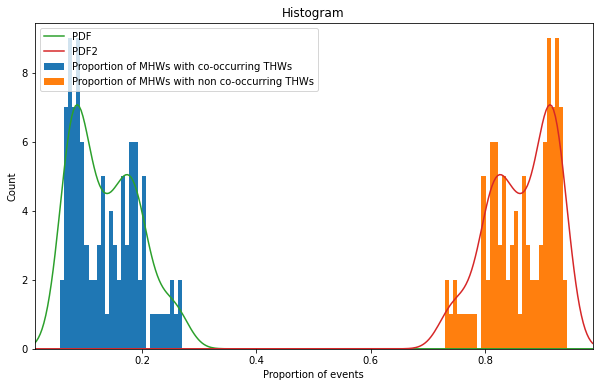

In [77]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(mhw_proportion_cooccurring, density=False, bins=30, label="Proportion of MHWs with co-occurring THWs")
plt.hist(mhw_proportion_noncooccurring, density=False, bins=30, label="Proportion of MHWs with non co-occurring THWs")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde_a = st.gaussian_kde(mhw_proportion_cooccurring)
kde_b = st.gaussian_kde(mhw_proportion_noncooccurring)
plt.plot(kde_xs, kde_a.pdf(kde_xs), label="PDF")
plt.plot(kde_xs, kde_b.pdf(kde_xs), label="PDF2")
plt.legend(loc="upper left")
plt.ylabel('Count')
plt.xlabel('Proportion of events')
plt.title("Histogram")
plt.savefig('histo-new-mhw')

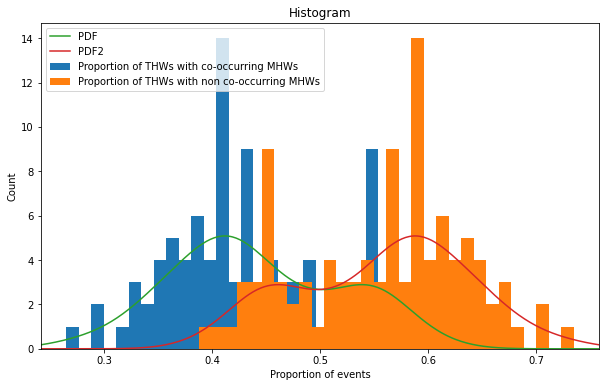

In [37]:
import scipy.stats as st
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(thw_proportion_cooccurring, density=False, bins=30, label="Proportion of THWs with co-occurring MHWs")
plt.hist(thw_proportion_noncooccurring, density=False, bins=30, label="Proportion of THWs with non co-occurring MHWs")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde_a = st.gaussian_kde(thw_proportion_cooccurring)
kde_b = st.gaussian_kde(thw_proportion_noncooccurring)
plt.plot(kde_xs, kde_a.pdf(kde_xs), label="PDF")
plt.plot(kde_xs, kde_b.pdf(kde_xs), label="PDF2")
plt.legend(loc="upper left")
plt.ylabel('Count')
plt.xlabel('Proportion of events')
plt.title("Histogram")
plt.savefig('histo-new')

In [38]:
# creating a new data array 'new_land' which is like 'anom' and we fill it with values from series1

new_land = xr.full_like(severity, fill_value=np.nan)
for d in series1_ds:
    new_land.loc[dict(latitude=d.latitude, longitude=d.longitude)] = d.values

In [39]:
# I have said anom for the reference object as I want the ssta values also to be saved in the land coordinates

new_ocean = xr.full_like(severity, fill_value=np.nan)
for d in series2_ds:
    new_ocean.loc[dict(longitude=d.longitude, latitude=d.latitude)] = d.values

In [41]:
new_thw = xr.where(new_land > 1.0, 1, 0)

In [42]:
new_mhw = xr.where(new_ocean > 1.0, 1, 0)

In [43]:
combined = new_thw + new_mhw

In [49]:
def lag_linregress_3D(x, y, lagx=0, lagy=0):
    """
    Input: Two xr.Datarrays of any dimensions with the first dim being time. 
    Thus the input data could be a 1D time series, or for example, have three dimensions (time,lat,lon). 
    Datasets can be provied in any order, but note that the regression slope and intercept will be calculated
    for y with respect to x.
    Output: Covariance, correlation, regression slope and intercept, p-value, and standard error on regression
    between the two datasets along their aligned time dimension.  
    Lag values can be assigned to either of the data, with lagx shifting x, and lagy shifting y, with the specified lag amount. 
    """ 
    #1. Ensure that the data are properly alinged to each other. 
    x,y = xr.align(x,y)
    
    a = sum(new_thw==1)
    b = sum(new_mhw==1)
    c = sum(combined==2)
    d = a-c
    e = b-c
    thw_co = c/a  
    thw_nco = d/a  
    mhw_co = c/b  
    mhw_nco = e/b


    return thw_co, thw_nco, mhw_co, mhw_nco

In [50]:
proportion_thw_co, proportion_thw_nco, proportion_mhw_co, proportion_mhw_nco = lag_linregress_3D(new_thw, new_mhw)

In [60]:
diff_thw = proportion_thw_co - proportion_thw_nco

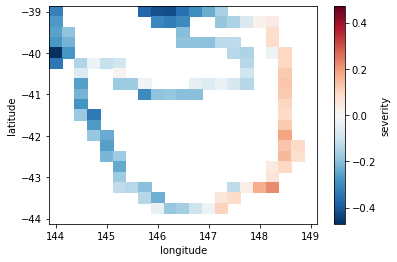

In [61]:
diff_thw.plot()

In [62]:
diff_mhw = proportion_mhw_co - proportion_mhw_nco

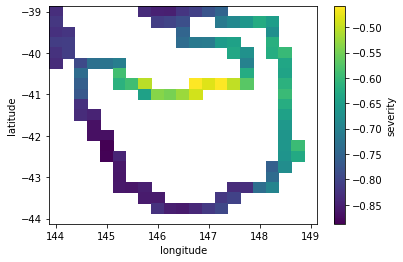

In [63]:
diff_mhw.plot()

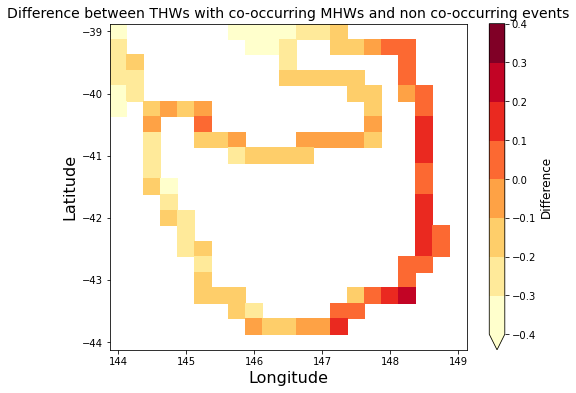

In [75]:
fig, ax = plt.subplots(figsize=(8,6)) 
ploteo=diff.plot(
    cmap=plt.cm.get_cmap('YlOrRd', 8),  
    vmin=-0.4, vmax=0.4, # Minimum and maximum values of the colormap
)
ploteo.colorbar.ax.set_ylabel('Difference',fontsize=12)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Difference between THWs with co-occurring MHWs and non co-occurring events', fontsize=14)
plt.savefig('/g/data/e14/cp3790/Charuni/proportion_thw_diff')

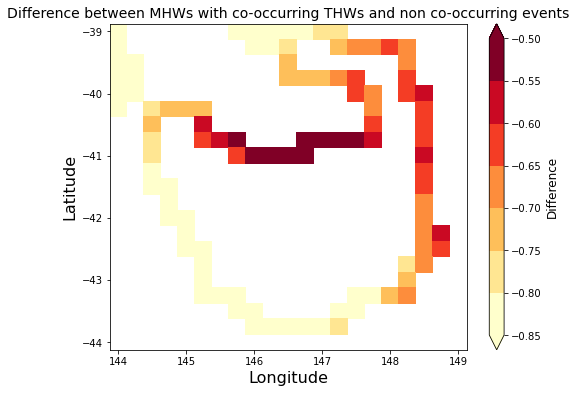

In [74]:
fig, ax = plt.subplots(figsize=(8,6)) 
ploteo=diff_mhw.plot(
    cmap=plt.cm.get_cmap('YlOrRd', 7),  
    vmin=-0.85, vmax=-0.5, # Minimum and maximum values of the colormap
)
ploteo.colorbar.ax.set_ylabel('Difference',fontsize=12)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Difference between MHWs with co-occurring THWs and non co-occurring events', fontsize=14)
plt.savefig('/g/data/e14/cp3790/Charuni/proportion_mhw_diff')